<a href="https://colab.research.google.com/github/eadami-usc/quantsc-project/blob/main/QuantSC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import re

In [ ]:
def parse_patent_assignments(xml_file_path, companies):
    # Parse the XML file
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    # Lists to store the extracted data
    data = []

    # Iterate through each patent assignment
    for assignment in root.findall('.//patent-assignment'):
        # Check assignee names for matches with biopharma companies
        assignees = assignment.find('.//patent-assignees')
        if assignees is None:
            continue

        matched_company = None
        assignee_name = None

        for assignee in assignees.findall('.//patent-assignee'):
            name_elem = assignee.find('name')
            if name_elem is not None and name_elem.text:
                assignee_name = name_elem.text.strip()
                # Check if any of our target companies appear in the assignee name
                for company in companies.keys():
                    if company in assignee_name.upper():
                        matched_company = company
                        break
                if matched_company:
                    break

        # If no match found, continue to the next assignment
        if not matched_company:
            continue

        # Extract patent properties
        properties = assignment.find('.//patent-properties')
        if properties is None:
            continue

        for patent_property in properties.findall('.//patent-property'):
            doc_ids = patent_property.findall('.//document-id')

            # We're looking for the second document ID (the actual patent publication, with kind A1)
            if len(doc_ids) >= 2:
                doc_id = doc_ids[1]

                # Check if it's an A1 kind document
                kind_elem = doc_id.find('kind')
                if kind_elem is None or kind_elem.text != 'A1':
                    continue

                # Extract patent number
                doc_number = doc_id.find('doc-number')
                patent_number = doc_number.text if doc_number is not None else None

                # Extract date
                date_elem = doc_id.find('date')
                date = date_elem.text if date_elem is not None else None

                # Extract invention title
                invention_title_elem = patent_property.find('.//invention-title')
                invention_title = ""
                if invention_title_elem is not None:
                    # Get all text content, including from nested elements
                    invention_title = ''.join(invention_title_elem.itertext()).strip()

                # Add data to our collection
                data.append({
                    'Company': matched_company,
                    'Ticker': companies[matched_company],
                    'Patent Number': patent_number,
                    'Date': date,
                    'Title': invention_title,
                })

    # Create pandas DataFrame
    df = pd.DataFrame(data)

    return df

In [ ]:
xml_file_path = "Patents.xml"

companies = {
    'PFIZER': 'PFE',
    'MODERNA': 'MRNA',
    'ELI LILLY': 'LLY',
    'JOHNSON &': 'JNJ',
    'MERCK SHARP': 'MRK',
    'NOVO NORDISK': 'NVO',
    'ABBVIE': 'ABBV',
    'NOVARTIS': 'NVS',
    'HOFFMAN-LA ROCHE': 'RHHBY',
    'AMGEN': 'AMGN',
    'BRISTOL-MYERS': 'BMY',
    'ASTRAZENECA': 'AZN',
    'VERTEX PHARMACEUTICALS': 'VRTX',
    'REGENERON': 'REGN',
    'GILEAD SCIENCES': 'GILD',
    'SANOFI': 'SNY',
    'BAYER': 'BAYRY',
    'TAKEDA PHARMACEUTICAL': 'TAK',
    'CSL LIMITED': 'CSL',
    'ZOETIS': 'ZTS',
    'BIOGEN': 'BIIB',
    'GRIFOLS': 'GRFS',
    'DAIICHI SANKYO': 'DSNKY',
    'SHIONOGI': 'SGIOY',
    'ASTELLAS PHARMA': 'ALPMY',
    'OTSUKA HOLDINGS': 'OTSKY',
    'UCB': 'UCBJF',
    'EISAI': 'ESALY',
    'CHUGAI PHARMACEUTICAL': 'CHGCY',
    'IPSEN': 'IPSEY',
    'TEVA PHARMACEUTICAL': 'TEVA',
    'BAUSCH HEALTH': 'BHC',
    'KYOWA KIRIN': 'KYKOF',
    'H. LUNDBECK': 'HLUYY',
    'SUMITOMO PHARMA': 'DNPUF',
    'BIOMARIN PHARMACEUTICAL': 'BMRN',
    'INCYTE': 'INCY',
    'UNITED THERAPEUTICS': 'UTHR',
    'NEUROCRINE BIOSCIENCES': 'NBIX',
    'ALNYLAM PHARMACEUTICALS': 'ALNY',
    'SEAGEN': 'SGEN',
    'EXELIXIS': 'EXEL',
    'JAZZ PHARMACEUTICALS': 'JAZZ',
    'ULTRAGENYX': 'RARE',
    'BLUEBIRD BIO': 'BLUE',
    'SAREPTA THERAPEUTICS': 'SRPT',
    'SPARK THERAPEUTICS': 'ONCE',
    'ARGENX': 'ARGX',
    'HORIZON THERAPEUTICS': 'HZNP',
    'ALKERMES': 'ALKS',
    'IONIS PHARMACEUTICALS': 'IONS',
    'SAGE THERAPEUTICS': 'SAGE',
    'ACADIA PHARMACEUTICALS': 'ACAD',
    'BLUEPRINT MEDICINES': 'BPMC',
    'AGIOS PHARMACEUTICALS': 'AGIO',
    'BIONTECH': 'BNTX',
    'NOVAVAX': 'NVAX',
    'CUREVAC': 'CVAC',
    'DENALI THERAPEUTICS': 'DNLI',
    'BEAM THERAPEUTICS': 'BEAM',
    'CRISPR THERAPEUTICS': 'CRSP',
    'EDITAS MEDICINE': 'EDIT',
    'INTELLIA THERAPEUTICS': 'NTLA',
    'FATE THERAPEUTICS': 'FATE',
    'REGENXBIO': 'RGNX',
    'ALLOGENE THERAPEUTICS': 'ALLO',
    'ATARA BIOTHERAPEUTICS': 'ATRA',
    'SANGAMO THERAPEUTICS': 'SGMO',
    'ARVINAS': 'ARVN',
    'IMMUNOGEN': 'IMGN',
    'GLOBAL BLOOD THERAPEUTICS': 'GBT',
    'TG THERAPEUTICS': 'TGTX',
    'KODIAK SCIENCES': 'KOD',
    'RELAY THERAPEUTICS': 'RLAY'
}

try:
    df = parse_patent_assignments(xml_file_path, companies)
    print(f"Found {len(df)} matching patent assignments")

    # Save to CSV
    df.to_csv("biopharma_patent_assignments.csv", index=False)
except Exception as e:
    print(f"Error processing XML file: {e}")

Found 7497 matching patent assignments
                Company Ticker Patent Number      Date  \
0           CSL LIMITED    CSL   20200038481  20200206   
1           CSL LIMITED    CSL   20210147509  20210520   
2           CSL LIMITED    CSL   20230142696  20230511   
3           CSL LIMITED    CSL   20220133852  20220505   
4                PFIZER    PFE   20230250173  20230810   
5                 BAYER  BAYRY   20240300412  20240912   
6       GILEAD SCIENCES   GILD   20230183262  20230615   
7   DENALI THERAPEUTICS   DNLI   20240025915  20240125   
8              NOVARTIS    NVS   20240309084  20240919   
9              NOVARTIS    NVS   20240309084  20240919   
10             NOVARTIS    NVS   20240309084  20240919   
11             NOVARTIS    NVS   20240309084  20240919   
12             NOVARTIS    NVS   20240309084  20240919   
13             NOVARTIS    NVS   20240309084  20240919   
14             NOVARTIS    NVS   20240309084  20240919   
15             NOVARTIS    NVS   

In [ ]:
# Remove duplicate patent numbers, keeping the first occurrence
df_unique = df.drop_duplicates(subset=['Patent Number'], keep='first')

# Print how many duplicates were removed
num_removed = len(df) - len(df_unique)
print(f"Removed {num_removed} duplicate patent entries")

# Reset the index to make it continuous
df_unique = df_unique.reset_index(drop=True)

# Replace the original dataframe with the deduplicated one
df = df_unique

df

Removed 0 duplicate patent entries


,Company,Ticker,Patent Number,Date,Title
0,CSL LIMITED,CSL,20200038481,20200206,RECONSTITUTED HIGH DENSITY LIPOPROTEIN TREATME...
1,CSL LIMITED,CSL,20210147509,20210520,CONTAMINANT REMOVAL METHOD
2,CSL LIMITED,CSL,20230142696,20230511,Reconstituted HDL Formulation
3,CSL LIMITED,CSL,20220133852,20220505,RECONSTITUTED HIGH DENSITY LIPOPROTEIN FORMULA...
4,PFIZER,PFE,20230250173,20230810,BIOMARKERS FOR PD-1 AXIS BINDING ANTAGONIST TH...
...,...,...,...,...,...
5063,TEVA PHARMACEUTICAL,TEVA,20240294537,20240905,SOLID STATE FORMS OF 4-[[4-(4-CHLOROANILINO)FU...
5064,NOVO NORDISK,NVO,20200331992,20201022,ANTI-TRANSTHYRETIN ANTIBODIES
5065,NOVO NORDISK,NVO,20200249244,20200806,METHODS OF DETECTING TRANSTHYRETIN
5066,NOVO NORDISK,NVO,20200362023,20201119,LYOPHILIZED FORMULATION OF A MONOCLONAL ANTIBO...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.ticker as mticker
from scipy.interpolate import make_interp_spline

In [ ]:
def plot_stock_with_patents(df, ticker_symbol, years=5):
    # Filter dataframe for the specific company
    company_patents = df[df['Ticker'] == ticker_symbol].copy()

    if company_patents.empty:
        print(f"No patent data found for {ticker_symbol}")
        return

    # Convert patent dates to datetime
    company_patents['DateObject'] = pd.to_datetime(company_patents['Date'], errors='coerce')

    # Remove any rows with invalid dates
    company_patents = company_patents.dropna(subset=['DateObject'])

    if company_patents.empty:
        print(f"No valid patent dates for {ticker_symbol}")
        return

    # Calculate the date range for stock data (5 years back from today)
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365 * years)

    # Get stock data
    print(f"Fetching stock data for {ticker_symbol}...")
    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date, progress=False)

    if stock_data.empty:
        print(f"No stock data found for {ticker_symbol}")
        return

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot stock price (adjusted close)
    ax1.plot(stock_data.index, stock_data['Close'], 'b-', label='Stock Price')
    ax1.set_ylabel('Stock Price ($)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Set x-axis to display dates nicely
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.xticks(rotation=45)

    # Add patent markers
    for idx, row in company_patents.iterrows():
        if row['DateObject'] >= start_date and row['DateObject'] <= end_date:
            ax1.axvline(x=row['DateObject'], color='r', linestyle='--', alpha=0.3)

    # Add patent count overlay
    ax2 = ax1.twinx()

    # Group patents by month and count
    company_patents['YearMonth'] = company_patents['DateObject'].dt.to_period('M')
    patent_counts = company_patents.groupby('YearMonth').size()

    # Convert period index to datetime for plotting
    patent_counts.index = patent_counts.index.to_timestamp()

    # Only include dates within our range
    patent_counts = patent_counts[
        (patent_counts.index >= start_date) &
        (patent_counts.index <= end_date)
    ]

    if not patent_counts.empty:
        ax2.bar(patent_counts.index, patent_counts.values, alpha=0.3, color='r', width=10, label='Patents')
        ax2.set_ylabel('Patent Count', color='r')
        ax2.tick_params(axis='y', labelcolor='r')

        # Set reasonable y-axis limits for patent count
        max_count = patent_counts.max()
        ax2.set_ylim(0, max_count + 1)

    # Add title and legend
    company_name = df[df['Ticker'] == ticker_symbol]['Company'].iloc[0] if not df[df['Ticker'] == ticker_symbol].empty else ticker_symbol
    plt.title(f"{company_name} ({ticker_symbol}) Stock Price and Patent Assignments")

    # Add combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    # Add grid
    ax1.grid(True, alpha=0.3)

    plt.tight_layout()
    return fig

In [ ]:
def plot_patents_vs_volatility(df, ticker_symbol, years=5, window=20):
    # Filter dataframe for the specific company
    company_patents = df[df['Ticker'] == ticker_symbol].copy()

    if company_patents.empty:
        print(f"No patent data found for {ticker_symbol}")
        return

    # Convert patent dates to datetime
    company_patents['DateObject'] = pd.to_datetime(company_patents['Date'], errors='coerce')

    # Remove any rows with invalid dates
    company_patents = company_patents.dropna(subset=['DateObject'])

    if company_patents.empty:
        print(f"No valid patent dates for {ticker_symbol}")
        return

    # Calculate the date range for stock data (5 years back from today)
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365 * years)

    # Get stock data
    print(f"Fetching stock data for {ticker_symbol}...")
    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date, progress=False)

    if stock_data.empty:
        print(f"No stock data found for {ticker_symbol}")
        return

    # Calculate volatility (standard deviation of returns over a window)
    stock_data['Returns'] = stock_data['Close'].pct_change()
    stock_data['Volatility'] = stock_data['Returns'].rolling(window=window).std() * np.sqrt(252) * 100  # Annualized volatility in percentage

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot volatility
    ax1.plot(stock_data.index, stock_data['Volatility'], 'b-', label=f'{window}-Day Volatility')
    ax1.set_ylabel('Volatility (%)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Set x-axis to display dates nicely
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.xticks(rotation=45)

    # Add patent markers
    for idx, row in company_patents.iterrows():
        if row['DateObject'] >= start_date and row['DateObject'] <= end_date:
            ax1.axvline(x=row['DateObject'], color='r', linestyle='--', alpha=0.3)

    # Add patent count overlay
    ax2 = ax1.twinx()

    # Group patents by month and count
    company_patents['YearMonth'] = company_patents['DateObject'].dt.to_period('M')
    patent_counts = company_patents.groupby('YearMonth').size()

    # Convert period index to datetime for plotting
    patent_counts.index = patent_counts.index.to_timestamp()

    # Only include dates within our range
    patent_counts = patent_counts[
        (patent_counts.index >= start_date) &
        (patent_counts.index <= end_date)
    ]

    if not patent_counts.empty:
        ax2.bar(patent_counts.index, patent_counts.values, alpha=0.3, color='r', width=10, label='Patents')
        ax2.set_ylabel('Patent Count', color='r')
        ax2.tick_params(axis='y', labelcolor='r')

        # Set reasonable y-axis limits for patent count
        max_count = patent_counts.max()
        ax2.set_ylim(0, max_count + 1)

    # Add title and legend
    company_name = df[df['Ticker'] == ticker_symbol]['Company'].iloc[0] if not df[df['Ticker'] == ticker_symbol].empty else ticker_symbol
    plt.title(f"{company_name} ({ticker_symbol}) Stock Volatility and Patent Assignments")

    # Add combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    # Add grid
    ax1.grid(True, alpha=0.3)
    plt.tight_layout()
    return fig

Fetching stock data for NVO...


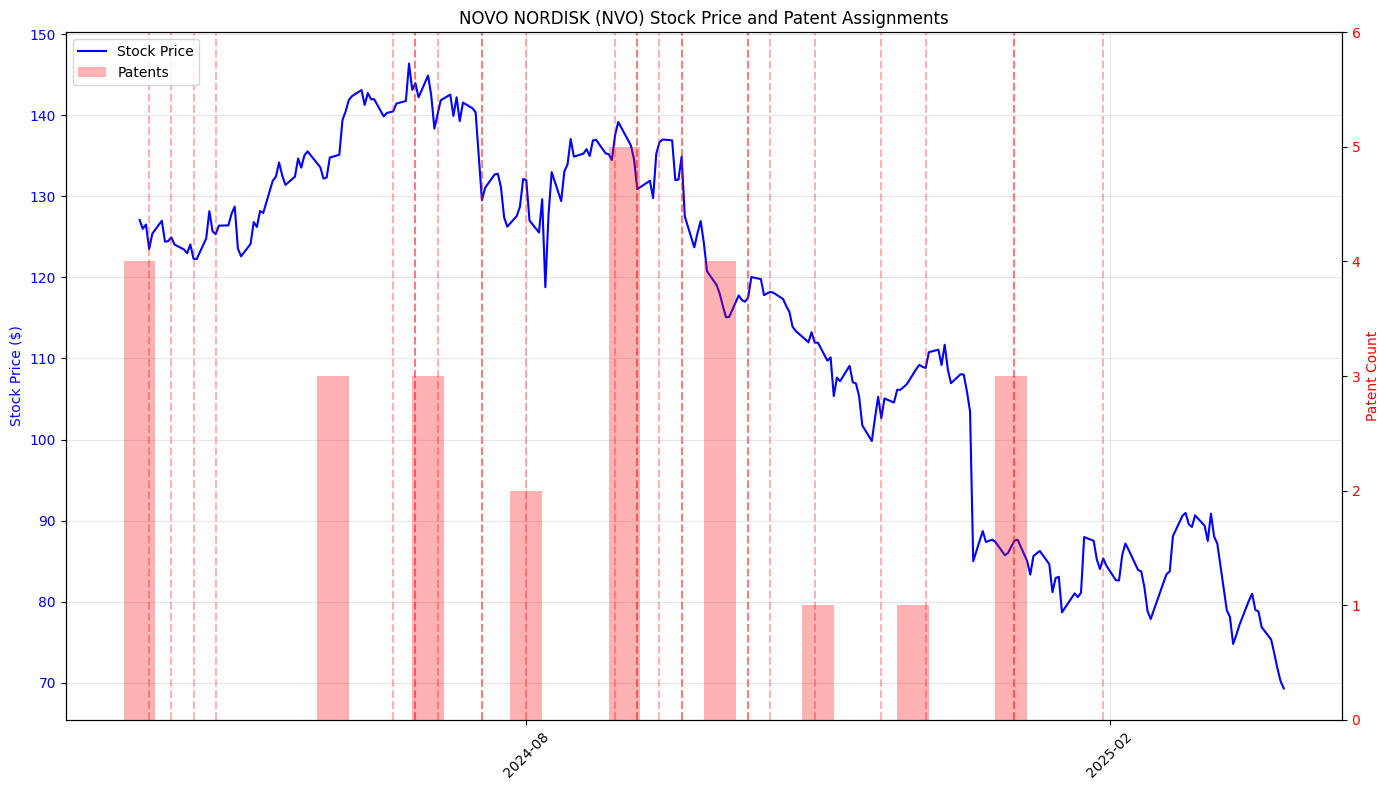

Fetching stock data for NVO...


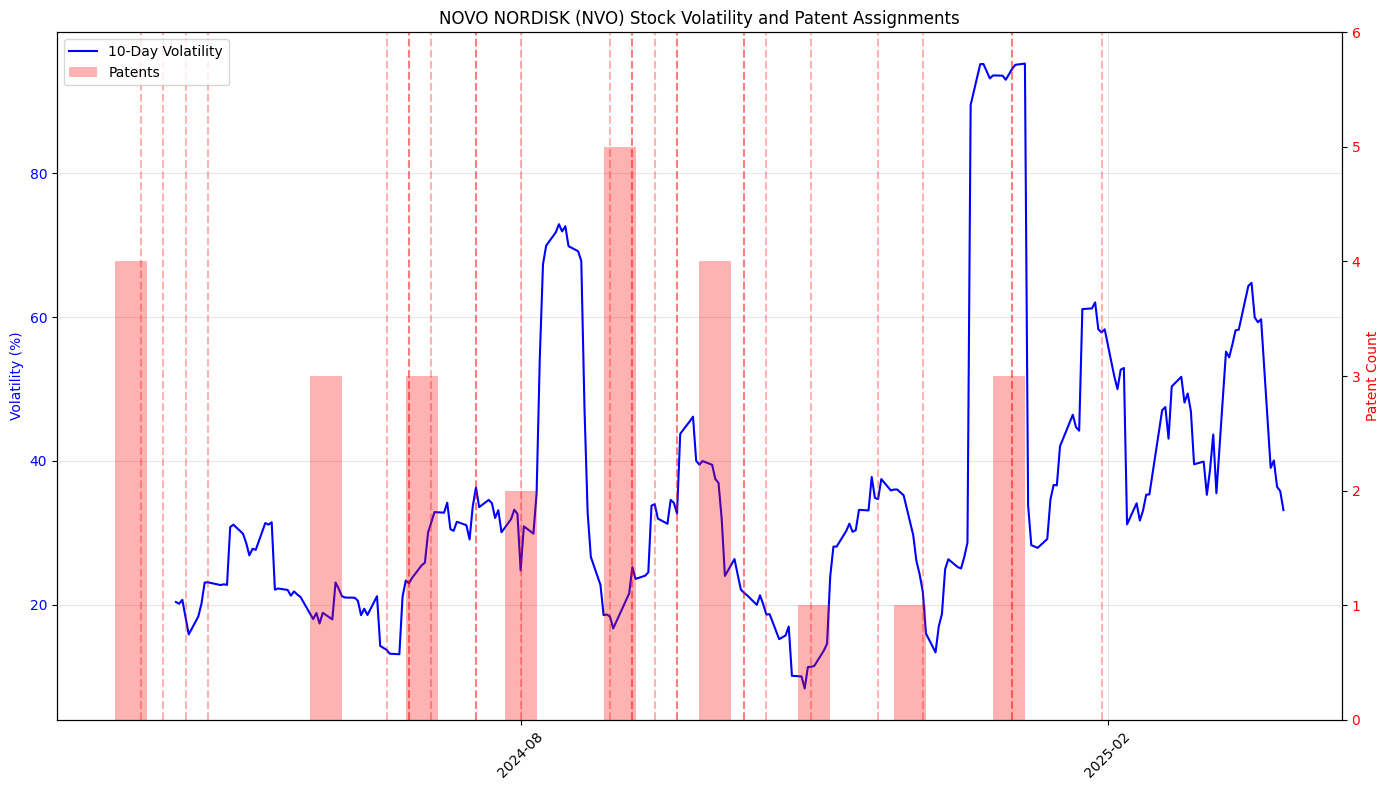

In [ ]:
# Plot a single company
plot_stock_with_patents(df, 'NVO', years=1)
plt.show()

plot_patents_vs_volatility(df, 'NVO', years=1, window=10)
plt.show()